# Rating Assigner Based on Reviews 

Objective: We are provided with data set that contains reviews about a business and the ratings provided by users. Having  this data as the input data for our model, we need to build a model whichwill assignthe stars based on the review provided.

We shall use the Yelp dataset from kaggle


## Step 1: Import Data

The dataset is availabel as csv file "yelp.csv"
Use pandas library read_csv() function to import data.

In [1]:
import numpy as np
import pandas as pd
yelp = pd.read_csv('yelp.csv')
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

Let us include a new column to store length of the reviews

In [4]:
yelp['text length'] = yelp['text'].apply(len)

## Step 2: EDA  & Visualization

Let us visualize few fields in the dataset.
Import the visualization libraries.
Before that, let us see the description of data.

In [2]:
yelp.describe()

stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000

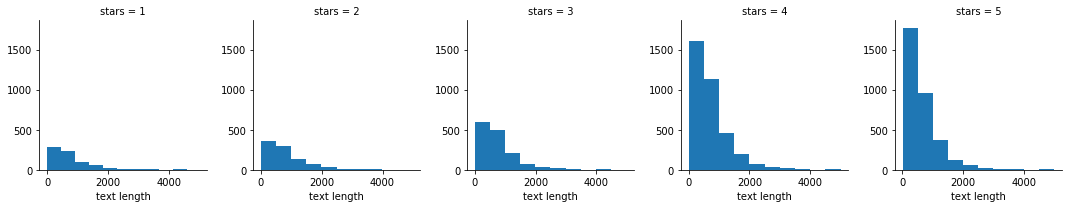

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. 

g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

Create a countplot of the number of occurrences for each type of star rating.

In [7]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

Use the corr() method on that groupby dataframe to produce this dataframe:

In [14]:
yelp.corr()

stars      cool    useful     funny  text length
stars        1.000000  0.052555 -0.023479 -0.061306    -0.114664
cool         0.052555  1.000000  0.887102  0.764342     0.241447
useful      -0.023479  0.887102  1.000000  0.723406     0.293975
funny       -0.061306  0.764342  0.723406  1.000000     0.251755
text length -0.114664  0.241447  0.293975  0.251755     1.000000

Then use seaborn to create a heatmap based off that .corr() dataframe:

In [12]:
sns.heatmap(yelp.corr(),cmap='coolwarm',annot=True)

## Step 3: Data Preprocessing

Let us filter 1 & 5 stars alone and use the data to build a model.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [15]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

Create two objects X and y.

X will be the 'text' column of yelp_class (input data)

y will be the 'stars' column of yelp_class. (Target label to be predicted)



In [16]:
X = yelp_class['text']
y = yelp_class['stars']

Import CountVectorizer and create a CountVectorizer object.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

## Step 4: Train & Test Data Preparation

Let's split our data into training and testing data.

Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Step 5: Build (Training) the Model

Import MultinomialNB, create an instance and fit using train data

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Step 6: Predictions and Evaluations

Use the predict method off of nb to predict labels from X_test.

Create a confusion matrix and classification report using these predictions and y_test.

In [22]:
predictions = nb.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



The model built seems to  classify the reviews to 5 and 1 star correctly with accuracy of 93%